In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from casadi import *
from casadi.tools import *
import pdb
import sys
sys.path.append('../../')
import do_mpc
from template_model_mhe import template_model
import matplotlib as mpl
from basic_units import radians, degrees, cos

In [56]:
mpl.rcParams['font.size'] = 12

In [46]:
%matplotlib notebook

Load data:

In [2]:
file_list = os.listdir('./results/')
n_res = len(file_list)

res = []
for file_i in file_list:
    res.append(do_mpc.data.load_results('./results/'+file_i))

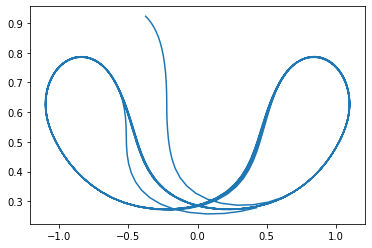

In [3]:
test_case = 20

res_k = res[test_case]['simulator']

phi = res_k['_x', 'phi']
theta = res_k['_x', 'theta']

plt.plot(phi,theta)

In [4]:
phi_meas = res_k['_x', 'phi']
phi_meas *= 1+0.01*np.random.randn(*phi_meas.shape)

theta_meas = res_k['_x', 'theta']
theta_meas *= 1+0.01*np.random.randn(*theta_meas.shape)

u_meas = res_k['_u', 'u_tilde']

E0_meas = res_k['_p','E_0']

meas = np.concatenate((phi_meas, theta_meas, E0_meas, u_meas),axis=1)

In [5]:
meas.shape

(700, 4)

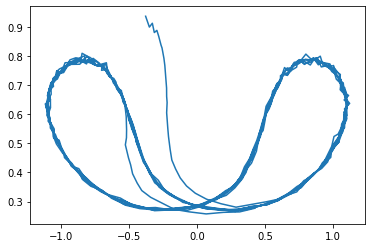

In [6]:
plt.plot(phi_meas,theta_meas)

In [7]:
model = template_model()

In [8]:
mhe = do_mpc.estimator.MHE(model)

setup_mhe = {
    'n_horizon': 10,
    't_step': 0.15,
    'store_full_solution': True,
    #'nlpsol_opts': {'ipopt.linear_solver': 'MA27'},
}

mhe.set_param(**setup_mhe)

P_x = np.diag(np.array([1,1,1, 1, 1e-2]))
P_y = np.diag(np.array([1,1,1, 1]))
P_w = np.diag(np.array([1,1e-2]))

# Or take the shortcut and just pass the tuning matrices for the default objective:
mhe.set_default_objective(P_x, P_y, P_w=P_w)

y_template = mhe.get_y_template()


def y_fun(t_now):
    n_steps = min(mhe.data._y.shape[0], mhe.n_horizon)
    for k in range(-n_steps,0):
        y_template['y_meas',k] = mhe.data._y[k]

    return y_template

mhe.set_y_fun(y_fun)

mhe.setup()


In [9]:
x0 = np.concatenate((res_k['_x'][0], res_k['_p'][0]))

mhe.set_initial_state(x0, reset_history=True)


for i in range(700):
#     phi_i = res_k['_x','phi'][i] 
#     theta_i = res_k['_x','theta'][i]
#     u_i = res_k['_u','u_tilde'][i]
#     E_i = res_k['_p', 'E_0'][i]
#     y_now = np.concatenate((phi_i,theta_i, u_i, E_i))
    mhe.make_step(meas[i].reshape(-1,1))


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equ

   2  9.7078226e+01 1.07e-05 4.69e-05  -2.5 3.43e-01  -4.5 1.00e+00 1.00e+00h  1
   3  9.7078262e+01 1.23e-08 2.69e-07  -5.7 2.42e-02  -5.0 1.00e+00 1.00e+00h  1
   4  9.7078262e+01 6.35e-12 2.15e-09  -8.6 5.80e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   9.7078261612560425e+01    9.7078261612560425e+01
Dual infeasibility......:   2.1485752385949621e-09    2.1485752385949621e-09
Constraint violation....:   6.3525439791302374e-12    6.3525439791302374e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.1485752385949621e-09    2.1485752385949621e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   4  4.8895956e-02 2.35e-12 5.46e-10  -8.6 1.47e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   4.8895956236958582e-02    4.8895956236958582e-02
Dual infeasibility......:   5.4595476765213191e-10    5.4595476765213191e-10
Constraint violation....:   2.3479269743720277e-12    2.3479269743720277e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.4595476765213191e-10    5.4595476765213191e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 4
Total CPU secs in IPOPT (w/o fun

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

   2  6.7718692e-02 4.00e-06 3.43e-05  -3.8 1.51e-01  -4.5 1.00e+00 1.00e+00h  1
   3  6.7724398e-02 1.18e-08 9.32e-08  -5.7 8.39e-03  -5.0 1.00e+00 1.00e+00h  1
   4  6.7724413e-02 4.33e-12 5.88e-10  -8.6 1.59e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   6.7724413162698310e-02    6.7724413162698310e-02
Dual infeasibility......:   5.8818091555982795e-10    5.8818091555982795e-10
Constraint violation....:   4.3312419623076082e-12    4.3312419623076082e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.8818091555982795e-10    5.8818091555982795e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  1.0686949e-01 2.23e-08 6.94e-08  -5.7 6.23e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.0686956e-01 5.74e-12 3.60e-10  -8.6 9.71e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.0686955677895096e-01    1.0686955677895096e-01
Dual infeasibility......:   3.5978783042504604e-10    3.5978783042504604e-10
Constraint violation....:   5.7439747402909802e-12    5.7439747402909802e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.5978783042504604e-10    3.5978783042504604e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  2.0399915e-02 1.27e-03 2.66e-02  -1.0 9.21e-01  -4.0 1.00e+00 1.00e+00f  1
   2  1.8407522e-02 8.78e-05 4.86e-04  -3.8 3.08e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.8442871e-02 1.63e-07 3.61e-07  -5.7 1.95e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.8443062e-02 5.21e-11 1.42e-09  -8.6 3.82e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.8443062201239303e-02    1.8443062201239303e-02
Dual infeasibility......:   1.4155922141074627e-09    1.4155922141074627e-09
Constraint violation....:   5.2102169800782860e-11    5.2102169800782860e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.4155922141074627e-09    1.4155922141074627e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequal

   3  2.7821130e-03 4.20e-08 1.88e-07  -8.6 1.70e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.7821127e-03 2.35e-11 1.42e-09  -8.6 3.82e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.7821126592240406e-03    2.7821126592240406e-03
Dual infeasibility......:   1.4154302061382373e-09    1.4154302061382373e-09
Constraint violation....:   2.3547205851848219e-11    2.3547205851848219e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.4154302061382373e-09    1.4154302061382373e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   4  3.4971262e-03 1.93e-11 1.54e-09  -8.6 4.15e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   3.4971262195866676e-03    3.4971262195866676e-03
Dual infeasibility......:   1.5386844912184836e-09    1.5386844912184836e-09
Constraint violation....:   1.9307402898682824e-11    1.9307402898682824e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.5386844912184836e-09    1.5386844912184836e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 4
Total CPU secs in IPOPT (w/o fun

   3  3.3552421e-03 1.54e-12 1.12e-09  -8.6 1.01e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   3.3552420892195706e-03    3.3552420892195706e-03
Dual infeasibility......:   1.1230661576992217e-09    1.1230661576992217e-09
Constraint violation....:   1.5361765678956196e-12    1.5361765678956196e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.1230661576992217e-09    1.1230661576992217e-09


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 4
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 3
Total CPU secs in IPOPT (w/o fun

   1  2.3021363e-03 1.62e-04 6.54e-04  -1.7 2.24e-01  -4.0 1.00e+00 1.00e+00f  1
   2  2.3012689e-03 1.49e-07 1.89e-07  -5.7 5.32e-03  -4.5 1.00e+00 1.00e+00h  1
   3  2.3012766e-03 1.30e-11 3.90e-09  -8.6 3.51e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   2.3012766293183163e-03    2.3012766293183163e-03
Dual infeasibility......:   3.9024616306491782e-09    3.9024616306491782e-09
Constraint violation....:   1.2969614965330223e-11    1.2969614965330223e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.9024616306491782e-09    3.9024616306491782e-09


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  2.7669100e-03 2.95e-10 1.25e-08  -8.6 1.12e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.7669100e-03 1.61e-13 9.68e-11  -9.0 2.61e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.7669099952194551e-03    2.7669099952194551e-03
Dual infeasibility......:   9.6778494351092285e-11    9.6778494351092285e-11
Constraint violation....:   1.6090601073770472e-13    1.6090601073770472e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.6778494351092285e-11    9.6778494351092285e-11


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

   2  3.5496913e-03 3.27e-04 5.45e-04  -3.8 6.17e-01  -4.5 1.00e+00 1.00e+00h  1
   3  3.5355544e-03 3.23e-07 8.59e-07  -5.7 3.88e-02  -5.0 1.00e+00 1.00e+00h  1
   4  3.5354517e-03 2.12e-10 3.11e-09  -8.6 8.40e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   3.5354517464734263e-03    3.5354517464734263e-03
Dual infeasibility......:   3.1122983624359260e-09    3.1122983624359260e-09
Constraint violation....:   2.1206955636010605e-10    2.1206955636010605e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1122983624359260e-09    3.1122983624359260e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  1.1564417e-03 1.70e-05 1.66e-04  -3.8 1.16e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.1591987e-03 1.23e-08 7.18e-08  -5.7 6.46e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.1592004e-03 5.79e-12 4.37e-10  -8.6 1.18e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.1592004162567613e-03    1.1592004162567613e-03
Dual infeasibility......:   4.3680695637773760e-10    4.3680695637773760e-10
Constraint violation....:   5.7868154712537034e-12    5.7868154712537034e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.3680695637773760e-10    4.3680695637773760e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  2.8946098e-03 8.13e-05 2.82e-04  -3.8 2.17e-01  -4.5 1.00e+00 1.00e+00h  1
   3  2.8929148e-03 8.85e-08 3.14e-07  -5.7 1.38e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.8929228e-03 2.42e-11 1.02e-09  -8.6 2.74e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.8929228231726516e-03    2.8929228231726516e-03
Dual infeasibility......:   1.0159563895804045e-09    1.0159563895804045e-09
Constraint violation....:   2.4206359139355982e-11    2.4206359139355982e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.0159563895804045e-09    1.0159563895804045e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  1.6302652e-03 4.27e-06 2.17e-05  -3.8 1.29e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.6297226e-03 9.18e-09 8.91e-08  -5.7 8.02e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.6297213e-03 4.59e-12 6.63e-10  -8.6 1.79e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.6297213214108357e-03    1.6297213214108357e-03
Dual infeasibility......:   6.6333234264371401e-10    6.6333234264371401e-10
Constraint violation....:   4.5926179526034616e-12    4.5926179526034616e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.6333234264371401e-10    6.6333234264371401e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   1  4.0357280e-03 1.38e-03 4.75e-03  -1.0 9.40e-01  -4.0 1.00e+00 1.00e+00f  1
   2  2.6806157e-03 1.79e-05 2.92e-05  -3.8 2.91e-01  -4.5 1.00e+00 1.00e+00h  1
   3  2.6819407e-03 3.58e-08 2.22e-07  -5.7 2.00e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.6819499e-03 2.17e-11 1.73e-09  -8.6 4.66e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.6819499336832009e-03    2.6819499336832009e-03
Dual infeasibility......:   1.7265594797847015e-09    1.7265594797847015e-09
Constraint violation....:   2.1730756083471192e-11    2.1730756083471192e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.7265594797847015e-09    1.7265594797847015e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequal

   3  3.7504518e-03 1.84e-11 4.64e-09  -8.6 4.18e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   3.7504517841899128e-03    3.7504517841899128e-03
Dual infeasibility......:   4.6425793740289496e-09    4.6425793740289496e-09
Constraint violation....:   1.8388526812351813e-11    1.8388526812351813e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.6425793740289496e-09    4.6425793740289496e-09


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 4
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 3
Total CPU secs in IPOPT (w/o fun

                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.3791887e-01 1.98e-12 4.98e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.3575276e-03 1.70e-04 6.52e-04  -1.7 2.50e-01  -4.0 1.00e+00 1.00e+00f  1
   2  2.2982389e-03 2.88e-07 3.17e-07  -5.7 8.37e-03  -4.5 1.00e+00 1.00e+00h  1
   3  2.2982074e-03 4.11e-11 6.31e-09  -8.6 5.68e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)         

   2  2.7576402e-03 8.25e-07 2.08e-06  -3.8 4.74e-02  -4.5 1.00e+00 1.00e+00h  1
   3  2.7575258e-03 2.71e-09 3.46e-08  -8.6 3.11e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.7575259e-03 1.46e-12 2.68e-10  -8.6 7.22e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.7575259047475120e-03    2.7575259047475120e-03
Dual infeasibility......:   2.6755045566404905e-10    2.6755045566404905e-10
Constraint violation....:   1.4568936335113136e-12    1.4568936335113136e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.6755045566404905e-10    2.6755045566404905e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  1.8576470e-03 6.88e-05 7.67e-05  -3.8 5.31e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.8568920e-03 2.57e-07 4.01e-07  -5.7 3.61e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.8567823e-03 1.14e-10 3.10e-09  -8.6 8.37e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.8567822886409921e-03    1.8567822886409921e-03
Dual infeasibility......:   3.1000811901928282e-09    3.1000811901928282e-09
Constraint violation....:   1.1352663253916262e-10    1.1352663253916262e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1000811901928282e-09    3.1000811901928282e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  2.0332588e-03 4.30e-04 9.53e-04  -3.8 5.93e-01  -4.5 1.00e+00 1.00e+00h  1
   3  2.0089734e-03 3.47e-07 1.02e-06  -5.7 3.53e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.0089047e-03 1.17e-10 2.73e-09  -8.6 7.37e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.0089046606697894e-03    2.0089046606697894e-03
Dual infeasibility......:   2.7309095287479168e-09    2.7309095287479168e-09
Constraint violation....:   1.1668369048756233e-10    1.1668369048756233e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.7309095287479168e-09    2.7309095287479168e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  5.2181587e-04 1.89e-08 9.54e-08  -5.7 8.59e-03  -5.0 1.00e+00 1.00e+00h  1
   4  5.2181665e-04 9.83e-12 5.97e-10  -8.6 1.61e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.2181664890095785e-04    5.2181664890095785e-04
Dual infeasibility......:   5.9686354257040667e-10    5.9686354257040667e-10
Constraint violation....:   9.8250019231471697e-12    9.8250019231471697e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.9686354257040667e-10    5.9686354257040667e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  1.3104545e-03 4.74e-08 1.84e-07  -5.7 1.05e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.3104498e-03 1.35e-11 8.04e-10  -8.6 2.17e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.3104498406530847e-03    1.3104498406530847e-03
Dual infeasibility......:   8.0353780919233988e-10    8.0353780919233988e-10
Constraint violation....:   1.3517825747655365e-11    1.3517825747655365e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   8.0353780919233988e-10    8.0353780919233988e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

   2  6.2347776e-03 9.79e-07 5.44e-06  -3.8 5.85e-02  -4.5 1.00e+00 1.00e+00h  1
   3  6.2348735e-03 1.78e-09 4.37e-08  -8.6 3.94e-03  -5.0 1.00e+00 1.00e+00h  1
   4  6.2348740e-03 9.68e-13 3.37e-10  -8.6 9.09e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   6.2348740179168256e-03    6.2348740179168256e-03
Dual infeasibility......:   3.3681153005744334e-10    3.3681153005744334e-10
Constraint violation....:   9.6830703177896993e-13    9.6830703177896993e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.3681153005744334e-10    3.3681153005744334e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0726832e-01 2.10e-11 3.50e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.9417436e-03 2.27e-04 9.63e-04  -1.7 1.75e-01  -4.0 1.00e+00 1.00e+00f  1
   2  2.9571652e-03 1.33e-07 2.02e-07  -5.7 3.07e-03  -4.5 1.00e+00 1.00e+00h  1
   3  2.9571807e-03 1.09e-12 9.87e-10  -8.6 8.89e-05  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)         

   3  3.3897973e-03 6.03e-10 1.85e-08  -8.6 1.66e-03  -5.0 1.00e+00 1.00e+00h  1
   4  3.3897973e-03 3.09e-13 1.43e-10  -9.0 3.86e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   3.3897973138765063e-03    3.3897973138765063e-03
Dual infeasibility......:   1.4305533568271158e-10    1.4305533568271158e-10
Constraint violation....:   3.0943303475083894e-13    3.0943303475083894e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.4305533568271158e-10    1.4305533568271158e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  5.8052183e-03 3.91e-08 1.23e-07  -8.6 1.11e-02  -5.0 1.00e+00 1.00e+00h  1
   4  5.8052134e-03 2.11e-11 9.54e-10  -8.6 2.58e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.8052133569468107e-03    5.8052133569468107e-03
Dual infeasibility......:   9.5374823269457074e-10    9.5374823269457074e-10
Constraint violation....:   2.1148194306874757e-11    2.1148194306874757e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.5374823269457074e-10    9.5374823269457074e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  1.7914434e-03 1.41e-04 1.22e-04  -3.8 6.43e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.7695939e-03 3.04e-07 4.86e-07  -5.7 4.37e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.7694990e-03 1.19e-10 3.70e-09  -8.6 9.99e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.7694989839136782e-03    1.7694989839136782e-03
Dual infeasibility......:   3.7004957430565385e-09    3.7004957430565385e-09
Constraint violation....:   1.1852785419819156e-10    1.1852785419819156e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.7004957430565385e-09    3.7004957430565385e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  1.6441566e-03 9.83e-05 5.01e-04  -3.8 2.65e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.6489328e-03 4.70e-08 1.61e-07  -5.7 1.44e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.6489215e-03 1.54e-11 1.02e-09  -8.6 2.75e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.6489214556234667e-03    1.6489214556234667e-03
Dual infeasibility......:   1.0175509291354125e-09    1.0175509291354125e-09
Constraint violation....:   1.5369233663520276e-11    1.5369233663520276e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.0175509291354125e-09    1.0175509291354125e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  1.5326179e-03 3.81e-05 2.20e-04  -3.8 1.75e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.5300527e-03 3.48e-08 1.08e-07  -5.7 9.69e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.5300512e-03 1.34e-11 6.73e-10  -8.6 1.82e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.5300511788996912e-03    1.5300511788996912e-03
Dual infeasibility......:   6.7254545883361760e-10    6.7254545883361760e-10
Constraint violation....:   1.3358564254772887e-11    1.3358564254772887e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.7254545883361760e-10    6.7254545883361760e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  2.1574017e-03 3.36e-06 1.89e-05  -3.8 6.17e-02  -4.5 1.00e+00 1.00e+00h  1
   3  2.1569125e-03 4.68e-09 4.44e-08  -5.7 4.00e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.1569115e-03 1.81e-12 3.12e-10  -8.6 8.41e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.1569114690640052e-03    2.1569114690640052e-03
Dual infeasibility......:   3.1161223340465196e-10    3.1161223340465196e-10
Constraint violation....:   1.8113843758271742e-12    1.8113843758271742e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1161223340465196e-10    3.1161223340465196e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   4  2.0528272e-03 3.24e-11 1.77e-09  -8.6 4.78e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.0528271926467754e-03    2.0528271926467754e-03
Dual infeasibility......:   1.7718823029432093e-09    1.7718823029432093e-09
Constraint violation....:   3.2367553082224276e-11    3.2367553082224276e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.7718823029432093e-09    1.7718823029432093e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 4
Total CPU secs in IPOPT (w/o fun

   3  2.6055433e-03 5.29e-09 7.87e-08  -8.6 7.08e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.6055446e-03 3.02e-12 6.08e-10  -8.6 1.64e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.6055445967148338e-03    2.6055445967148338e-03
Dual infeasibility......:   6.0849980331999698e-10    6.0849980331999698e-10
Constraint violation....:   3.0214546142826038e-12    3.0214546142826038e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.0849980331999698e-10    6.0849980331999698e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  3.1998847e-03 2.29e-04 8.08e-04  -1.7 1.68e-01  -4.0 1.00e+00 1.00e+00f  1
   2  3.2330605e-03 6.47e-08 9.68e-08  -5.7 2.11e-03  -4.5 1.00e+00 1.00e+00h  1
   3  3.2330713e-03 2.57e-13 6.10e-10  -8.6 5.49e-05  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   3.2330713390852951e-03    3.2330713390852951e-03
Dual infeasibility......:   6.0995418199525141e-10    6.0995418199525141e-10
Constraint violation....:   2.5684695256072976e-13    2.5684695256072976e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.0995418199525141e-10    6.0995418199525141e-10


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   1  4.6349199e-03 1.65e-04 6.17e-04  -1.7 2.33e-01  -4.0 1.00e+00 1.00e+00f  1
   2  4.6066814e-03 5.67e-07 8.69e-07  -5.7 2.61e-02  -4.5 1.00e+00 1.00e+00h  1
   3  4.6066944e-03 5.29e-10 2.00e-08  -8.6 1.80e-03  -5.0 1.00e+00 1.00e+00h  1
   4  4.6066944e-03 2.69e-13 1.55e-10  -9.0 4.18e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   4.6066944438398795e-03    4.6066944438398795e-03
Dual infeasibility......:   1.5495818469230839e-10    1.5495818469230839e-10
Constraint violation....:   2.6857682744463318e-13    2.6857682744463318e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.5495818469230839e-10    1.5495818469230839e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequal

   2  2.6966698e-03 3.23e-06 3.07e-06  -3.8 9.21e-02  -4.5 1.00e+00 1.00e+00h  1
   3  2.6964550e-03 1.09e-08 6.76e-08  -8.6 6.08e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.6964545e-03 5.91e-12 5.24e-10  -8.6 1.41e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.6964544559761987e-03    2.6964544559761987e-03
Dual infeasibility......:   5.2360516977624827e-10    5.2360516977624827e-10
Constraint violation....:   5.9070699720553677e-12    5.9070699720553677e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.2360516977624827e-10    5.2360516977624827e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  1.5328059e-03 1.78e-07 3.72e-07  -5.7 3.35e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.5327369e-03 7.40e-11 2.86e-09  -8.6 7.73e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.5327369492475825e-03    1.5327369492475825e-03
Dual infeasibility......:   2.8626269488053427e-09    2.8626269488053427e-09
Constraint violation....:   7.3950477685880145e-11    7.3950477685880145e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.8626269488053427e-09    2.8626269488053427e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  1.5900115e-03 1.47e-07 4.91e-07  -5.7 2.45e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.5899840e-03 3.93e-11 1.84e-09  -8.6 4.96e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.5899839563408447e-03    1.5899839563408447e-03
Dual infeasibility......:   1.8375240639851204e-09    1.8375240639851204e-09
Constraint violation....:   3.9271946805641278e-11    3.9271946805641278e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.8375240639851204e-09    1.8375240639851204e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  1.0914191e-03 2.55e-05 1.67e-04  -3.8 1.35e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.0931382e-03 1.61e-08 8.02e-08  -5.7 7.22e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.0931392e-03 7.24e-12 4.93e-10  -8.6 1.33e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.0931392197919307e-03    1.0931392197919307e-03
Dual infeasibility......:   4.9336149773754367e-10    4.9336149773754367e-10
Constraint violation....:   7.2424011232641305e-12    7.2424011232641305e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.9336149773754367e-10    4.9336149773754367e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  2.7923047e-03 4.00e-08 1.36e-07  -5.7 9.98e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.7923068e-03 1.24e-11 7.55e-10  -8.6 2.04e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.7923068097019089e-03    2.7923068097019089e-03
Dual infeasibility......:   7.5498794333075980e-10    7.5498794333075980e-10
Constraint violation....:   1.2365275470216375e-11    1.2365275470216375e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.5498794333075980e-10    7.5498794333075980e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  1.3816795e-03 3.32e-08 1.76e-07  -5.7 1.59e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.3816748e-03 1.86e-11 1.33e-09  -8.6 3.60e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.3816748372809016e-03    1.3816748372809016e-03
Dual infeasibility......:   1.3329218095685417e-09    1.3329218095685417e-09
Constraint violation....:   1.8609225271859486e-11    1.8609225271859486e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.3329218095685417e-09    1.3329218095685417e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  2.0792397e-03 1.36e-08 1.32e-07  -8.6 1.19e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.0792419e-03 8.13e-12 1.02e-09  -8.6 2.76e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.0792419491826404e-03    2.0792419491826404e-03
Dual infeasibility......:   1.0207940702086951e-09    1.0207940702086951e-09
Constraint violation....:   8.1341305219195803e-12    8.1341305219195803e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.0207940702086951e-09    1.0207940702086951e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  4.7270074e-03 2.84e-04 7.42e-04  -1.7 1.58e-01  -4.0 1.00e+00 1.00e+00f  1
   2  4.7099678e-03 1.21e-07 2.56e-07  -5.7 7.63e-03  -4.5 1.00e+00 1.00e+00h  1
   3  4.7099602e-03 2.92e-11 5.84e-09  -8.6 5.26e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   4.7099601639775650e-03    4.7099601639775650e-03
Dual infeasibility......:   5.8417396460187673e-09    5.8417396460187673e-09
Constraint violation....:   2.9245204565334082e-11    2.9245204565334082e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.8417396460187673e-09    5.8417396460187673e-09


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   1  1.8264856e-03 1.83e-04 6.51e-04  -1.7 2.35e-01  -4.0 1.00e+00 1.00e+00f  1
   2  1.8284486e-03 6.70e-07 9.38e-07  -5.7 2.82e-02  -4.5 1.00e+00 1.00e+00h  1
   3  1.8284942e-03 6.00e-10 2.16e-08  -8.6 1.95e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.8284943e-03 3.02e-13 1.67e-10  -9.0 4.52e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.8284942589351448e-03    1.8284942589351448e-03
Dual infeasibility......:   1.6732868136910798e-10    1.6732868136910798e-10
Constraint violation....:   3.0234148518104575e-13    3.0234148518104575e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.6732868136910798e-10    1.6732868136910798e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequal

   2  4.5050404e-03 5.15e-06 3.54e-06  -3.8 1.06e-01  -4.5 1.00e+00 1.00e+00h  1
   3  4.5051689e-03 1.56e-08 7.75e-08  -8.6 6.97e-03  -5.0 1.00e+00 1.00e+00h  1
   4  4.5051670e-03 8.51e-12 6.03e-10  -8.6 1.63e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   4.5051669550386295e-03    4.5051669550386295e-03
Dual infeasibility......:   6.0251120251718194e-10    6.0251120251718194e-10
Constraint violation....:   8.5093286583681760e-12    8.5093286583681760e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.0251120251718194e-10    6.0251120251718194e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  4.0601128e-03 2.31e-07 4.14e-07  -5.7 3.73e-02  -5.0 1.00e+00 1.00e+00h  1
   4  4.0600113e-03 8.78e-11 3.19e-09  -8.6 8.61e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   4.0600112812599256e-03    4.0600112812599256e-03
Dual infeasibility......:   3.1885941346202161e-09    3.1885941346202161e-09
Constraint violation....:   8.7813964433358649e-11    8.7813964433358649e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1885941346202161e-09    3.1885941346202161e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  3.2933662e-03 1.09e-07 3.78e-07  -5.7 2.13e-02  -5.0 1.00e+00 1.00e+00h  1
   4  3.2933421e-03 2.62e-11 1.58e-09  -8.6 4.28e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   3.2933420735508489e-03    3.2933420735508489e-03
Dual infeasibility......:   1.5848714696077508e-09    1.5848714696077508e-09
Constraint violation....:   2.6203039737993095e-11    2.6203039737993095e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.5848714696077508e-09    1.5848714696077508e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  4.5471860e-04 2.73e-05 1.73e-04  -3.8 1.43e-01  -4.5 1.00e+00 1.00e+00h  1
   3  4.5510001e-04 1.84e-08 8.52e-08  -5.7 7.67e-03  -5.0 1.00e+00 1.00e+00h  1
   4  4.5510021e-04 8.06e-12 5.26e-10  -8.6 1.42e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   4.5510020595470392e-04    4.5510020595470392e-04
Dual infeasibility......:   5.2621644337749335e-10    5.2621644337749335e-10
Constraint violation....:   8.0618844933155742e-12    8.0618844933155742e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.2621644337749335e-10    5.2621644337749335e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  1.3904129e-03 2.54e-08 9.02e-08  -5.7 8.12e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.3904116e-03 8.05e-12 6.19e-10  -8.6 1.67e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.3904115842923559e-03    1.3904115842923559e-03
Dual infeasibility......:   6.1857925303179305e-10    6.1857925303179305e-10
Constraint violation....:   8.0487561060493817e-12    8.0487561060493817e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.1857925303179305e-10    6.1857925303179305e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Objective...............:   1.9937759095410650e-03    1.9937759095410650e-03
Dual infeasibility......:   1.0368944618978101e-09    1.0368944618978101e-09
Constraint violation....:   8.2853723881726182e-12    8.2853723881726182e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.0368944618978101e-09    1.0368944618978101e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 4
Total CPU secs in IPOPT (w/o function evaluations)   =      0.017
Total CPU secs in NLP function evaluations           =      0.000

EXIT: Optimal Solution Found.
               t_proc [s]   t_wall [s]    n_eval
  

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.8325906e-01 9.40e-14 4.45e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.8758325e-03 2.09e-04 6.34e-04  -1.7 2.24e-01  -4.0 1.00e+00 1.00e+00f  1
   2  1.8792239e-03 6.24e-07 8.54e-07  -5.7 2.56e-02  -4.5 1.00e+00 1.00e+00h  1
   3  1.8791853e-03 4.34e-10 1.95e-08  -8.6 1.76e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.8791852e-03 2.18e-13 1.51e-10  -9.0 4.07e-05  -5.4 1.00e+00 1.00e+00h  1



   3  2.9585976e-03 9.25e-10 2.02e-08  -8.6 1.82e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.9585976e-03 5.02e-13 1.56e-10  -9.0 4.22e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.9585976372831667e-03    2.9585976372831667e-03
Dual infeasibility......:   1.5621170625738098e-10    1.5621170625738098e-10
Constraint violation....:   5.0211571012148681e-13    5.0211571012148681e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.5621170625738098e-10    1.5621170625738098e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  1.3794878e-02 1.75e-07 3.17e-07  -5.7 2.85e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.3794822e-02 8.95e-11 2.45e-09  -8.6 6.62e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.3794822403080909e-02    1.3794822403080909e-02
Dual infeasibility......:   2.4532919048814849e-09    2.4532919048814849e-09
Constraint violation....:   8.9518024937174090e-11    8.9518024937174090e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.4532919048814849e-09    2.4532919048814849e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  1.7929791e-03 3.22e-04 4.86e-04  -3.8 5.99e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.7795821e-03 3.38e-07 8.19e-07  -5.7 3.80e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.7794910e-03 2.12e-10 3.06e-09  -8.6 8.26e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.7794910022754388e-03    1.7794910022754388e-03
Dual infeasibility......:   3.0585961492233475e-09    3.0585961492233475e-09
Constraint violation....:   2.1222490431682672e-10    2.1222490431682672e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.0585961492233475e-09    3.0585961492233475e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  1.0448458e-03 1.05e-08 6.64e-08  -5.7 5.97e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.0448467e-03 4.98e-12 4.05e-10  -8.6 1.09e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.0448466932358280e-03    1.0448466932358280e-03
Dual infeasibility......:   4.0498810491530953e-10    4.0498810491530953e-10
Constraint violation....:   4.9787673983558989e-12    4.9787673983558989e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.0498810491530953e-10    4.0498810491530953e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  4.3192397e-03 9.54e-08 3.38e-07  -5.7 1.38e-02  -5.0 1.00e+00 1.00e+00h  1
   4  4.3192299e-03 2.58e-11 1.02e-09  -8.6 2.75e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   4.3192299157544592e-03    4.3192299157544592e-03
Dual infeasibility......:   1.0201106012529907e-09    1.0201106012529907e-09
Constraint violation....:   2.5828589267362645e-11    2.5828589267362645e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.0201106012529907e-09    1.0201106012529907e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

   3  3.3717947e-03 5.88e-08 2.85e-07  -5.7 2.56e-02  -5.0 1.00e+00 1.00e+00h  1
   4  3.3718101e-03 3.77e-11 2.21e-09  -8.6 5.97e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   3.3718101061505534e-03    3.3718101061505534e-03
Dual infeasibility......:   2.2107881247690295e-09    2.2107881247690295e-09
Constraint violation....:   3.7746972214591779e-11    3.7746972214591779e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2107881247690295e-09    2.2107881247690295e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  2.3962540e-03 5.00e-11 7.60e-09  -8.6 6.84e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   2.3962540282372324e-03    2.3962540282372324e-03
Dual infeasibility......:   7.6024731565139136e-09    7.6024731565139136e-09
Constraint violation....:   5.0006535370905603e-11    5.0006535370905603e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.6024731565139136e-09    7.6024731565139136e-09


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 4
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 3
Total CPU secs in IPOPT (w/o fun

   1  2.8222635e-03 1.85e-04 6.22e-04  -1.7 2.66e-01  -4.0 1.00e+00 1.00e+00f  1
   2  2.8623498e-03 2.20e-07 4.47e-07  -5.7 1.34e-02  -4.5 1.00e+00 1.00e+00h  1
   3  2.8623968e-03 7.72e-11 9.98e-09  -8.6 8.98e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   2.8623968490424498e-03    2.8623968490424498e-03
Dual infeasibility......:   9.9809624006332793e-09    9.9809624006332793e-09
Constraint violation....:   7.7197558241703934e-11    7.7197558241703934e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.9809624006332793e-09    9.9809624006332793e-09


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  2.1485290e-03 4.46e-07 9.93e-07  -3.8 2.93e-02  -4.5 1.00e+00 1.00e+00h  1
   3  2.1485064e-03 9.81e-10 2.21e-08  -8.6 1.99e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.1485064e-03 5.40e-13 1.72e-10  -9.0 4.65e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.1485063979583478e-03    2.1485063979583478e-03
Dual infeasibility......:   1.7215892142579354e-10    1.7215892142579354e-10
Constraint violation....:   5.4020329876003359e-13    5.4020329876003359e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.7215892142579354e-10    1.7215892142579354e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  2.6424723e-03 1.59e-07 2.95e-07  -5.7 2.66e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.6424143e-03 8.61e-11 2.29e-09  -8.6 6.19e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.6424142877874103e-03    2.6424142877874103e-03
Dual infeasibility......:   2.2920805382299643e-09    2.2920805382299643e-09
Constraint violation....:   8.6134155363737364e-11    8.6134155363737364e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2920805382299643e-09    2.2920805382299643e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  2.5653513e-03 2.83e-04 3.99e-04  -3.8 6.06e-01  -4.5 1.00e+00 1.00e+00h  1
   3  2.5504819e-03 3.37e-07 7.00e-07  -5.7 3.91e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.5503697e-03 2.17e-10 3.19e-09  -8.6 8.61e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.5503696704623521e-03    2.5503696704623521e-03
Dual infeasibility......:   3.1878576600570144e-09    3.1878576600570144e-09
Constraint violation....:   2.1728294163914086e-10    2.1728294163914086e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1878576600570144e-09    3.1878576600570144e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  5.3199882e-03 1.18e-08 7.10e-08  -5.7 6.38e-03  -5.0 1.00e+00 1.00e+00h  1
   4  5.3199896e-03 5.73e-12 4.35e-10  -8.6 1.17e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.3199895976090116e-03    5.3199895976090116e-03
Dual infeasibility......:   4.3470243199827235e-10    4.3470243199827235e-10
Constraint violation....:   5.7258364716261667e-12    5.7258364716261667e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.3470243199827235e-10    4.3470243199827235e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  1.0946512e-03 1.04e-07 3.52e-07  -5.7 1.51e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.0946549e-03 2.89e-11 1.10e-09  -8.6 2.98e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.0946549388442834e-03    1.0946549388442834e-03
Dual infeasibility......:   1.1039464355325596e-09    1.1039464355325596e-09
Constraint violation....:   2.8851546152175445e-11    2.8851546152175445e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.1039464355325596e-09    1.1039464355325596e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

   3  2.8300207e-03 5.53e-11 7.97e-09  -8.6 7.17e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   2.8300207278704860e-03    2.8300207278704860e-03
Dual infeasibility......:   7.9700309974044838e-09    7.9700309974044838e-09
Constraint violation....:   5.5331032290661941e-11    5.5331032290661941e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.9700309974044838e-09    7.9700309974044838e-09


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 4
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 3
Total CPU secs in IPOPT (w/o fun

   2  2.7044611e-03 3.43e-07 4.82e-07  -5.7 1.45e-02  -4.5 1.00e+00 1.00e+00h  1
   3  2.7044735e-03 1.14e-10 1.09e-08  -8.6 9.82e-04  -5.0 1.00e+00 1.00e+00h  1
   4  2.7044735e-03 5.47e-14 8.41e-11  -9.0 2.27e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.7044734988906664e-03    2.7044734988906664e-03
Dual infeasibility......:   8.4108436209380438e-11    8.4108436209380438e-11
Constraint violation....:   5.4747872901828032e-14    5.4747872901828032e-14
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   8.4108436209380438e-11    8.4108436209380438e-11


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  2.3677298e-03 1.03e-09 2.17e-08  -8.6 1.96e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.3677298e-03 5.63e-13 1.69e-10  -9.0 4.56e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.3677298029550968e-03    2.3677298029550968e-03
Dual infeasibility......:   1.6884046209543129e-10    1.6884046209543129e-10
Constraint violation....:   5.6330634601309271e-13    5.6330634601309271e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.6884046209543129e-10    1.6884046209543129e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  1.4935137e-03 4.61e-05 5.27e-05  -3.8 4.01e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.4952850e-03 1.44e-07 3.02e-07  -5.7 2.72e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.4952441e-03 7.38e-11 2.34e-09  -8.6 6.32e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.4952441266157857e-03    1.4952441266157857e-03
Dual infeasibility......:   2.3402833351926166e-09    2.3402833351926166e-09
Constraint violation....:   7.3834899999569714e-11    7.3834899999569714e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.3402833351926166e-09    2.3402833351926166e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  4.4760515e-03 2.36e-04 3.58e-04  -3.8 5.20e-01  -4.5 1.00e+00 1.00e+00h  1
   3  4.4711828e-03 2.42e-07 5.79e-07  -5.7 3.31e-02  -5.0 1.00e+00 1.00e+00h  1
   4  4.4711220e-03 1.56e-10 2.68e-09  -8.6 7.23e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   4.4711220100134459e-03    4.4711220100134459e-03
Dual infeasibility......:   2.6763674473661402e-09    2.6763674473661402e-09
Constraint violation....:   1.5563053623601775e-10    1.5563053623601775e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.6763674473661402e-09    2.6763674473661402e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  1.8292863e-03 7.91e-09 5.66e-08  -5.7 5.09e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.8292865e-03 3.75e-12 3.46e-10  -8.6 9.34e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.8292865364450525e-03    1.8292865364450525e-03
Dual infeasibility......:   3.4592434181940555e-10    3.4592434181940555e-10
Constraint violation....:   3.7518044226914071e-12    3.7518044226914071e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.4592434181940555e-10    3.4592434181940555e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  1.7497818e-03 9.25e-08 2.79e-07  -5.7 1.40e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.7497678e-03 2.75e-11 1.03e-09  -8.6 2.78e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.7497678002987398e-03    1.7497678002987398e-03
Dual infeasibility......:   1.0308427854082964e-09    1.0308427854082964e-09
Constraint violation....:   2.7496852017527829e-11    2.7496852017527829e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.0308427854082964e-09    1.0308427854082964e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  4.0505043e-03 3.03e-10 1.45e-08  -8.6 1.30e-03  -5.0 1.00e+00 1.00e+00h  1
   4  4.0505042e-03 1.17e-13 1.07e-10  -9.0 2.89e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   4.0505042281008229e-03    4.0505042281008229e-03
Dual infeasibility......:   1.0702638348362420e-10    1.0702638348362420e-10
Constraint violation....:   1.1716322356747355e-13    1.1716322356747355e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.0702638348362420e-10    1.0702638348362420e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  4.8606136e-03 2.90e-05 4.80e-05  -3.8 3.78e-01  -4.5 1.00e+00 1.00e+00h  1
   3  4.8597187e-03 6.69e-08 2.87e-07  -5.7 2.58e-02  -5.0 1.00e+00 1.00e+00h  1
   4  4.8597293e-03 4.24e-11 2.23e-09  -8.6 6.01e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   4.8597292838935399e-03    4.8597292838935399e-03
Dual infeasibility......:   2.2267802099577161e-09    2.2267802099577161e-09
Constraint violation....:   4.2411518741403142e-11    4.2411518741403142e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2267802099577161e-09    2.2267802099577161e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  2.8015740e-03 2.61e-07 1.16e-06  -3.8 1.37e-02  -4.5 1.00e+00 1.00e+00h  1
   3  2.8016124e-03 9.12e-11 1.00e-08  -8.6 9.01e-04  -5.0 1.00e+00 1.00e+00h  1
   4  2.8016124e-03 4.78e-14 7.77e-11  -9.0 2.10e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.8016123809946809e-03    2.8016123809946809e-03
Dual infeasibility......:   7.7687598237303372e-11    7.7687598237303372e-11
Constraint violation....:   4.7815917891824711e-14    4.7815917891824711e-14
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.7687598237303372e-11    7.7687598237303372e-11


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  2.9029909e-03 4.73e-08 2.56e-07  -5.7 7.68e-03  -4.5 1.00e+00 1.00e+00h  1
   3  2.9029819e-03 2.64e-11 5.92e-09  -8.6 5.33e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   2.9029819497635610e-03    2.9029819497635610e-03
Dual infeasibility......:   5.9230056718568833e-09    5.9230056718568833e-09
Constraint violation....:   2.6392492575091908e-11    2.6392492575091908e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.9230056718568833e-09    5.9230056718568833e-09


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 4
Number of inequality constraint Jacobian evaluations = 0
Number o

                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.1038085e-01 3.33e-13 5.71e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.5781614e-03 1.78e-04 8.42e-04  -1.7 2.88e-01  -4.0 1.00e+00 1.00e+00f  1
   2  2.5925205e-03 7.54e-07 1.20e-06  -5.7 3.61e-02  -4.5 1.00e+00 1.00e+00h  1
   3  2.5925296e-03 1.05e-09 2.79e-08  -8.6 2.51e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.5925297e-03 5.46e-13 2.17e-10  -8.6 5.87e-05  -5.4 1.00e+00 1.00e+00h  1



   1  3.8914855e-03 4.84e-03 1.07e-02  -1.0 1.58e+00  -4.0 1.00e+00 1.00e+00f  1
   2  3.5427321e-03 6.44e-06 4.33e-06  -3.8 1.30e-01  -4.5 1.00e+00 1.00e+00h  1
   3  3.5428312e-03 1.98e-08 9.63e-08  -8.6 8.67e-03  -5.0 1.00e+00 1.00e+00h  1
   4  3.5428290e-03 1.09e-11 7.49e-10  -8.6 2.02e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   3.5428289504859586e-03    3.5428289504859586e-03
Dual infeasibility......:   7.4928044951792230e-10    7.4928044951792230e-10
Constraint violation....:   1.0923307397492366e-11    1.0923307397492366e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.4928044951792230e-10    7.4928044951792230e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequal

   2  1.3284332e-03 8.68e-05 9.09e-05  -3.8 5.02e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.3224621e-03 1.53e-07 3.76e-07  -5.7 3.38e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.3224090e-03 5.65e-11 2.88e-09  -8.6 7.78e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.3224090216684933e-03    1.3224090216684933e-03
Dual infeasibility......:   2.8823532583101574e-09    2.8823532583101574e-09
Constraint violation....:   5.6533288467219833e-11    5.6533288467219833e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.8823532583101574e-09    2.8823532583101574e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  1.5560391e-03 1.14e-04 5.53e-04  -3.8 3.16e-01  -4.5 1.00e+00 1.00e+00h  1
   3  1.5461350e-03 6.85e-08 1.96e-07  -5.7 1.75e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.5461258e-03 1.35e-11 1.28e-09  -8.6 3.45e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.5461257969231436e-03    1.5461257969231436e-03
Dual infeasibility......:   1.2765608551341664e-09    1.2765608551341664e-09
Constraint violation....:   1.3525524450441750e-11    1.3525524450441750e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.2765608551341664e-09    1.2765608551341664e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  9.4771027e-04 3.75e-05 2.40e-04  -3.8 1.77e-01  -4.5 1.00e+00 1.00e+00h  1
   3  9.4736488e-04 2.97e-08 1.09e-07  -5.7 9.81e-03  -5.0 1.00e+00 1.00e+00h  1
   4  9.4736795e-04 1.29e-11 6.89e-10  -8.6 1.86e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   9.4736794740131632e-04    9.4736794740131632e-04
Dual infeasibility......:   6.8912725764384000e-10    6.8912725764384000e-10
Constraint violation....:   1.2889439515717527e-11    1.2889439515717527e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.8912725764384000e-10    6.8912725764384000e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  1.5302627e-03 8.18e-06 3.31e-05  -3.8 8.46e-02  -4.5 1.00e+00 1.00e+00h  1
   3  1.5297866e-03 8.88e-09 6.17e-08  -5.7 5.55e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.5297855e-03 3.34e-12 4.37e-10  -8.6 1.18e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.5297854948028197e-03    1.5297854948028197e-03
Dual infeasibility......:   4.3746327578798080e-10    4.3746327578798080e-10
Constraint violation....:   3.3427288714804604e-12    3.3427288714804604e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.3746327578798080e-10    4.3746327578798080e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  2.5644152e-03 5.03e-08 2.32e-07  -5.7 2.09e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.5644169e-03 3.00e-11 1.78e-09  -8.6 4.80e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.5644168655424909e-03    2.5644168655424909e-03
Dual infeasibility......:   1.7761486135114658e-09    1.7761486135114658e-09
Constraint violation....:   2.9985250393771423e-11    2.9985250393771423e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.7761486135114658e-09    1.7761486135114658e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  3.3580887e-03 4.78e-09 7.76e-08  -8.6 6.98e-03  -5.0 1.00e+00 1.00e+00h  1
   4  3.3580894e-03 2.74e-12 6.02e-10  -8.6 1.63e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   3.3580894297543552e-03    3.3580894297543552e-03
Dual infeasibility......:   6.0238815241312227e-10    6.0238815241312227e-10
Constraint violation....:   2.7375896688441870e-12    2.7375896688441870e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.0238815241312227e-10    6.0238815241312227e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  5.9127297e-02 1.13e-11 2.38e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  3.5948518e-03 2.69e-04 5.60e-04  -1.7 1.21e-01  -4.0 1.00e+00 1.00e+00f  1
   2  3.6049723e-03 9.74e-08 2.45e-07  -5.7 7.34e-03  -4.5 1.00e+00 1.00e+00h  1
   3  3.6049735e-03 2.50e-11 5.65e-09  -8.6 5.09e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   3.6049735432281448e-03    3.6049735432281448e-03
Dual infeasibility......:   5.6534801126079963e-09    5.6534801126079963e-09
Constraint violation....:   2.5038665151660977e-11    2.5038665151660977e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.6534801126079963e-09    5.6534801126079963e-09


Number of objective function evaluations  

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.8801703e-01 2.62e-13 5.97e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.8463750e-03 2.11e-04 8.95e-04  -1.7 3.01e-01  -4.0 1.00e+00 1.00e+00f  1
   2  2.8441813e-03 8.77e-07 1.14e-06  -5.7 3.43e-02  -4.5 1.00e+00 1.00e+00h  1
   3  2.8441274e-03 9.40e-10 2.64e-08  -8.6 2.37e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.8441274e-03 4.81e-13 2.05e-10  -8.6 5.53e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.8441274002626062e-03    2.8441274002626062e-03
Dual infeasibility......:   2.0497413466487716e-10    2.0497413466487716e-10
Constraint violation....:   4.8064330293584590e-13    4.8064330293584590e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.0497413466487716e-10    2.0497413466487716e-10


Number of objective functi

   2  2.0712232e-03 9.69e-06 6.50e-06  -3.8 1.58e-01  -4.5 1.00e+00 1.00e+00h  1
   3  2.0710289e-03 3.09e-08 1.16e-07  -8.6 1.05e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.0710267e-03 1.67e-11 9.02e-10  -8.6 2.44e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.0710266534126960e-03    2.0710266534126960e-03
Dual infeasibility......:   9.0244086497094618e-10    9.0244086497094618e-10
Constraint violation....:   1.6694503418568374e-11    1.6694503418568374e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.0244086497094618e-10    9.0244086497094618e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  3.0634129e-03 1.54e-04 1.58e-04  -3.8 6.30e-01  -4.5 1.00e+00 1.00e+00h  1
   3  3.0510101e-03 2.89e-07 4.75e-07  -5.7 4.28e-02  -5.0 1.00e+00 1.00e+00h  1
   4  3.0508554e-03 1.04e-10 3.64e-09  -8.6 9.83e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   3.0508554404978525e-03    3.0508554404978525e-03
Dual infeasibility......:   3.6407446536338291e-09    3.6407446536338291e-09
Constraint violation....:   1.0416195683760066e-10    1.0416195683760066e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.6407446536338291e-09    3.6407446536338291e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  1.5803700e-03 4.93e-08 1.68e-07  -5.7 1.50e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.5803640e-03 2.02e-11 1.07e-09  -8.6 2.88e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.5803639872185595e-03    1.5803639872185595e-03
Dual infeasibility......:   1.0670502026609193e-09    1.0670502026609193e-09
Constraint violation....:   2.0218576812780498e-11    2.0218576812780498e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.0670502026609193e-09    1.0670502026609193e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  2.6639598e-03 5.68e-08 1.44e-07  -5.7 1.30e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.6639573e-03 2.24e-11 9.28e-10  -8.6 2.51e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.6639573363277983e-03    2.6639573363277983e-03
Dual infeasibility......:   9.2783389672103464e-10    9.2783389672103464e-10
Constraint violation....:   2.2437635083250029e-11    2.2437635083250029e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.2783389672103464e-10    9.2783389672103464e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

    nlp_grad      6.2e-05     2.19e-05         1
  nlp_grad_f      2.6e-05     2.37e-05         6
  nlp_hess_l     0.000103     0.000103         4
   nlp_jac_g     0.000146     0.000107         6
This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality const

   3  1.7148094e-03 7.36e-08 2.95e-07  -5.7 2.65e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.7148170e-03 4.63e-11 2.27e-09  -8.6 6.13e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.7148170237275937e-03    1.7148170237275937e-03
Dual infeasibility......:   2.2704625028743434e-09    2.2704625028743434e-09
Constraint violation....:   4.6299422629125786e-11    4.6299422629125786e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2704625028743434e-09    2.2704625028743434e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  2.4333983e-03 8.98e-10 3.20e-08  -8.6 2.88e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.4333985e-03 4.88e-13 2.47e-10  -8.6 6.68e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.4333985157994854e-03    2.4333985157994854e-03
Dual infeasibility......:   2.4726080141265169e-10    2.4726080141265169e-10
Constraint violation....:   4.8753188985894980e-13    4.8753188985894980e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.4726080141265169e-10    2.4726080141265169e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  3.2530131e-03 8.00e-08 2.57e-07  -5.7 7.71e-03  -4.5 1.00e+00 1.00e+00h  1
   3  3.2530030e-03 2.74e-11 5.96e-09  -8.6 5.37e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   3.2530030099633313e-03    3.2530030099633313e-03
Dual infeasibility......:   5.9619650494018627e-09    5.9619650494018627e-09
Constraint violation....:   2.7411376120334285e-11    2.7411376120334285e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.9619650494018627e-09    5.9619650494018627e-09


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 4
Number of inequality constraint Jacobian evaluations = 0
Number o

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

   3  2.0550176e-03 2.08e-08 9.58e-08  -8.6 8.62e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.0550157e-03 1.13e-11 7.44e-10  -8.6 2.01e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.0550156580283470e-03    2.0550156580283470e-03
Dual infeasibility......:   7.4412390771141578e-10    7.4412390771141578e-10
Constraint violation....:   1.1274883804368585e-11    1.1274883804368585e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.4412390771141578e-10    7.4412390771141578e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  2.0520029e-03 7.08e-05 7.02e-05  -3.8 4.96e-01  -4.5 1.00e+00 1.00e+00h  1
   3  2.0503483e-03 1.81e-07 3.75e-07  -5.7 3.38e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.0502649e-03 7.66e-11 2.90e-09  -8.6 7.83e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.0502648679917223e-03    2.0502648679917223e-03
Dual infeasibility......:   2.9014548354959745e-09    2.9014548354959745e-09
Constraint violation....:   7.6554280276086573e-11    7.6554280276086573e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.9014548354959745e-09    2.9014548354959745e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  2.4844272e-03 2.39e-04 6.32e-04  -3.8 4.30e-01  -4.5 1.00e+00 1.00e+00h  1
   3  2.4828239e-03 1.48e-07 5.12e-07  -5.7 2.52e-02  -5.0 1.00e+00 1.00e+00h  1
   4  2.4827919e-03 4.22e-11 1.92e-09  -8.6 5.19e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.4827918965490852e-03    2.4827918965490852e-03
Dual infeasibility......:   1.9225385238069762e-09    1.9225385238069762e-09
Constraint violation....:   4.2177455972236544e-11    4.2177455972236544e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.9225385238069762e-09    1.9225385238069762e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  2.6274251e-03 2.60e-05 1.60e-04  -3.8 1.32e-01  -4.5 1.00e+00 1.00e+00h  1
   3  2.6288461e-03 1.40e-08 7.94e-08  -5.7 7.15e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.6288472e-03 6.82e-12 4.99e-10  -8.6 1.35e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.6288472327162873e-03    2.6288472327162873e-03
Dual infeasibility......:   4.9898933676726661e-10    4.9898933676726661e-10
Constraint violation....:   6.8210159742676524e-12    6.8210159742676524e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.9898933676726661e-10    4.9898933676726661e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  1.0016877e-03 4.30e-08 1.47e-07  -5.7 1.06e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.0016859e-03 1.35e-11 8.21e-10  -8.6 2.22e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.0016858914977680e-03    1.0016858914977680e-03
Dual infeasibility......:   8.2134860941312412e-10    8.2134860941312412e-10
Constraint violation....:   1.3468781645542549e-11    1.3468781645542549e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   8.2134860941312412e-10    8.2134860941312412e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   3  1.3325416e-03 2.39e-08 1.57e-07  -8.6 1.41e-02  -5.0 1.00e+00 1.00e+00h  1
   4  1.3325415e-03 1.34e-11 1.19e-09  -8.6 3.22e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.3325415412499529e-03    1.3325415412499529e-03
Dual infeasibility......:   1.1926912481260549e-09    1.1926912481260549e-09
Constraint violation....:   1.3372997154093014e-11    1.3372997154093014e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.1926912481260549e-09    1.1926912481260549e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  4.8154576e-03 8.52e-06 1.32e-05  -3.8 1.83e-01  -4.5 1.00e+00 1.00e+00h  1
   3  4.8153695e-03 1.35e-08 1.41e-07  -8.6 1.27e-02  -5.0 1.00e+00 1.00e+00h  1
   4  4.8153725e-03 8.26e-12 1.10e-09  -8.6 2.96e-04  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   4.8153724761411630e-03    4.8153724761411630e-03
Dual infeasibility......:   1.0967983317171686e-09    1.0967983317171686e-09
Constraint violation....:   8.2627273079172170e-12    8.2627273079172170e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.0967983317171686e-09    1.0967983317171686e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

   3  1.6756098e-03 2.10e-10 1.57e-08  -8.6 1.41e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.6756098e-03 1.04e-13 1.21e-10  -9.0 3.28e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.6756097632475860e-03    1.6756097632475860e-03
Dual infeasibility......:   1.2146261822009240e-10    1.2146261822009240e-10
Constraint violation....:   1.0355605262191148e-13    1.0355605262191148e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.2146261822009240e-10    1.2146261822009240e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  2.8395476e-03 5.64e-07 7.97e-07  -5.7 2.39e-02  -4.5 1.00e+00 1.00e+00h  1
   3  2.8395084e-03 8.41e-10 1.87e-08  -8.6 1.69e-03  -5.0 1.00e+00 1.00e+00h  1
   4  2.8395084e-03 4.59e-13 1.47e-10  -9.0 3.96e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   2.8395083588742234e-03    2.8395083588742234e-03
Dual infeasibility......:   1.4681394937719323e-10    1.4681394937719323e-10
Constraint violation....:   4.5893844280442408e-13    4.5893844280442408e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.4681394937719323e-10    1.4681394937719323e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   3  4.0228832e-03 4.83e-06 7.05e-06  -5.7 9.51e-02  -5.0 1.00e+00 1.00e+00h  1
   4  4.0217889e-03 8.15e-10 7.36e-09  -8.6 1.99e-03  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   4.0217889227639079e-03    4.0217889227639079e-03
Dual infeasibility......:   7.3628261388606378e-09    7.3628261388606378e-09
Constraint violation....:   8.1503341575750454e-10    8.1503341575750454e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.3628261388606378e-09    7.3628261388606378e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.8856485e-02 4.01e-03 8.03e-02  -1.0 2.67e+00  -4.0 1.00e+00 1.00e+00f  1
   2  3.2001919e-03 1.02e-03 8.63e-04  -2.5 1.03e+00  -4.5 1.00e+00 1.00e+00h  1
   3  3.1582173e-03 1.47e-06 3.44e-06  -5.7 6.56e-02  -5.0 1.00e+00 1.00e+00h  1
   4  3.1579949e-03 7.24e-10 5.28e-09  -8.6 1.42e-03  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   3.1579949240543789e-03    3.1579949240543789e-03
Dual infeasibility......:   5.2776146961288185e-09    5.2776146961288185e-09
Constraint violation....:   7.2402306372509884e-10    7.2402306372509884e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.2776146961288185e-09    5.2776146961288185e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequal

   3  1.8433594e-03 7.87e-09 5.36e-08  -5.7 4.82e-03  -5.0 1.00e+00 1.00e+00h  1
   4  1.8433594e-03 3.29e-12 3.20e-10  -8.6 8.65e-05  -5.4 1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   1.8433593761514157e-03    1.8433593761514157e-03
Dual infeasibility......:   3.2046918227379429e-10    3.2046918227379429e-10
Constraint violation....:   3.2928382243113674e-12    3.2928382243113674e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.2046918227379429e-10    3.2046918227379429e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number o

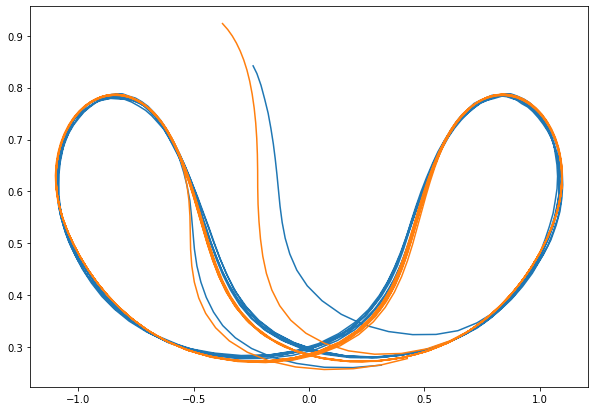

In [10]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(mhe.data['_x','phi'][10:], mhe.data['_x','theta'][10:])
ax.plot(res_k['_x','phi'], res_k['_x','theta'])

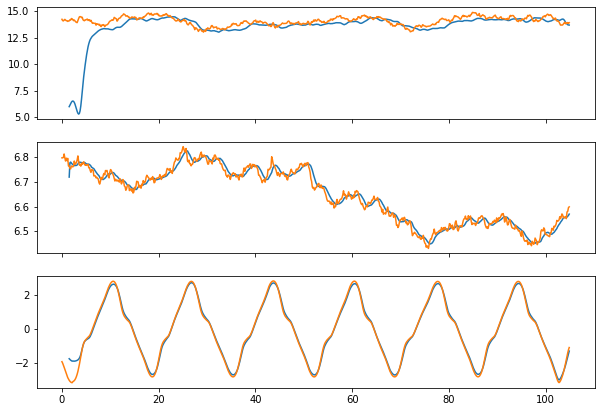

In [11]:
fig, ax = plt.subplots(3,1,figsize=(10,7), sharex=True)

ax[0].plot(mhe.data['_time'][10:], mhe.data['_x','v_0'][10:])
ax[0].plot(res_k['_time'], res_k['_p','v_0'])

ax[1].plot(mhe.data['_time'][10:], mhe.data['_x','E_0'][10:])
ax[1].plot(res_k['_time'], res_k['_p','E_0'])

ax[2].plot(mhe.data['_time'][10:], mhe.data['_x','psi'][10:])
ax[2].plot(res_k['_time'], res_k['_x','psi'])

# Comparison with RNN

In [12]:
from RNN_tools import get_model
from tensorflow import keras
import pickle

rnn_model = '011'

with open('./models/{model}_RNN/{model}_RNN_config.pkl'.format(model=rnn_model),'rb') as f:
    model_config = pickle.load(f)

rnn_estimator = get_model(model_config['model_param'], nx=4, ny=5, batch_size=1, seq_length=1, stateful=True)
rnn_estimator.load_weights('./models/{model}_RNN/{model}_RNN_weights'.format(model=rnn_model), by_name=False)

def estimator_update(rnn_in):
    rnn_in_scaled = rnn_in.reshape(1,-1)/model_config['x_scaling']
    rnn_out_scaled = rnn_estimator.predict(rnn_in_scaled.reshape(1,1,-1)).squeeze()
    rnn_out = rnn_out_scaled*model_config['y_scaling']
    return rnn_out


In [13]:
rnn_res = []
for i in range(700):
    rnn_out = estimator_update(meas[i])
    rnn_res.append(rnn_out)
rnn_res = np.array(rnn_res)

In [14]:
rnn_res_df = pd.DataFrame(rnn_res, columns=['phi','theta','psi','u_tilde','v_0'], index=res_k['_time'].flatten())

In [96]:
fig, ax= plt.subplots(4, sharex=True, figsize=(11,6))

ax[0].plot(res_k['_time'], res_k['_x','phi'], label='GT')
rnn_res_df.plot(y=['phi'], ax=ax[0], label=['LSTM'])
ax[0].plot(mhe.data['_time'], mhe.data['_x','phi'], label='MHE')
ax[0].legend()
ax[0].set_ylabel('azim. angle $\phi$ [rad] \n w.r.t wind direction')

ax[1].plot(res_k['_time'], res_k['_x','theta'], label='GT')
rnn_res_df.plot(y=['theta'], ax=ax[1], label=['LSTM'])
ax[1].plot(mhe.data['_time'], mhe.data['_x','theta'], label='MHE')
ax[1].legend(loc=1)
ax[1].set_ylabel('zenith angle \n $\\theta$ [rad]')

ax[2].plot(res_k['_time'], res_k['_x','psi'], label='GT')
rnn_res_df.plot(y=['psi'], ax=ax[2], label=['LSTM'])
ax[2].plot(mhe.data['_time'], mhe.data['_x','psi'], label='MHE')
ax[2].legend()
ax[2].set_ylabel('kite heading \n $\\psi$ [rad]')

ax[3].plot(res_k['_time'], res_k['_p','v_0'], label='GT')
rnn_res_df.plot(y=['v_0'], ax=ax[3], label=['LSTM'])
ax[3].plot(mhe.data['_time'], mhe.data['_x','v_0'], label='MHE')
ax[3].legend()
ax[3].set_xlabel('time [s]')
ax[3].set_ylabel('wind speed \n $v$ [m/s]')

fig.align_ylabels()
fig.tight_layout(pad=0.4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


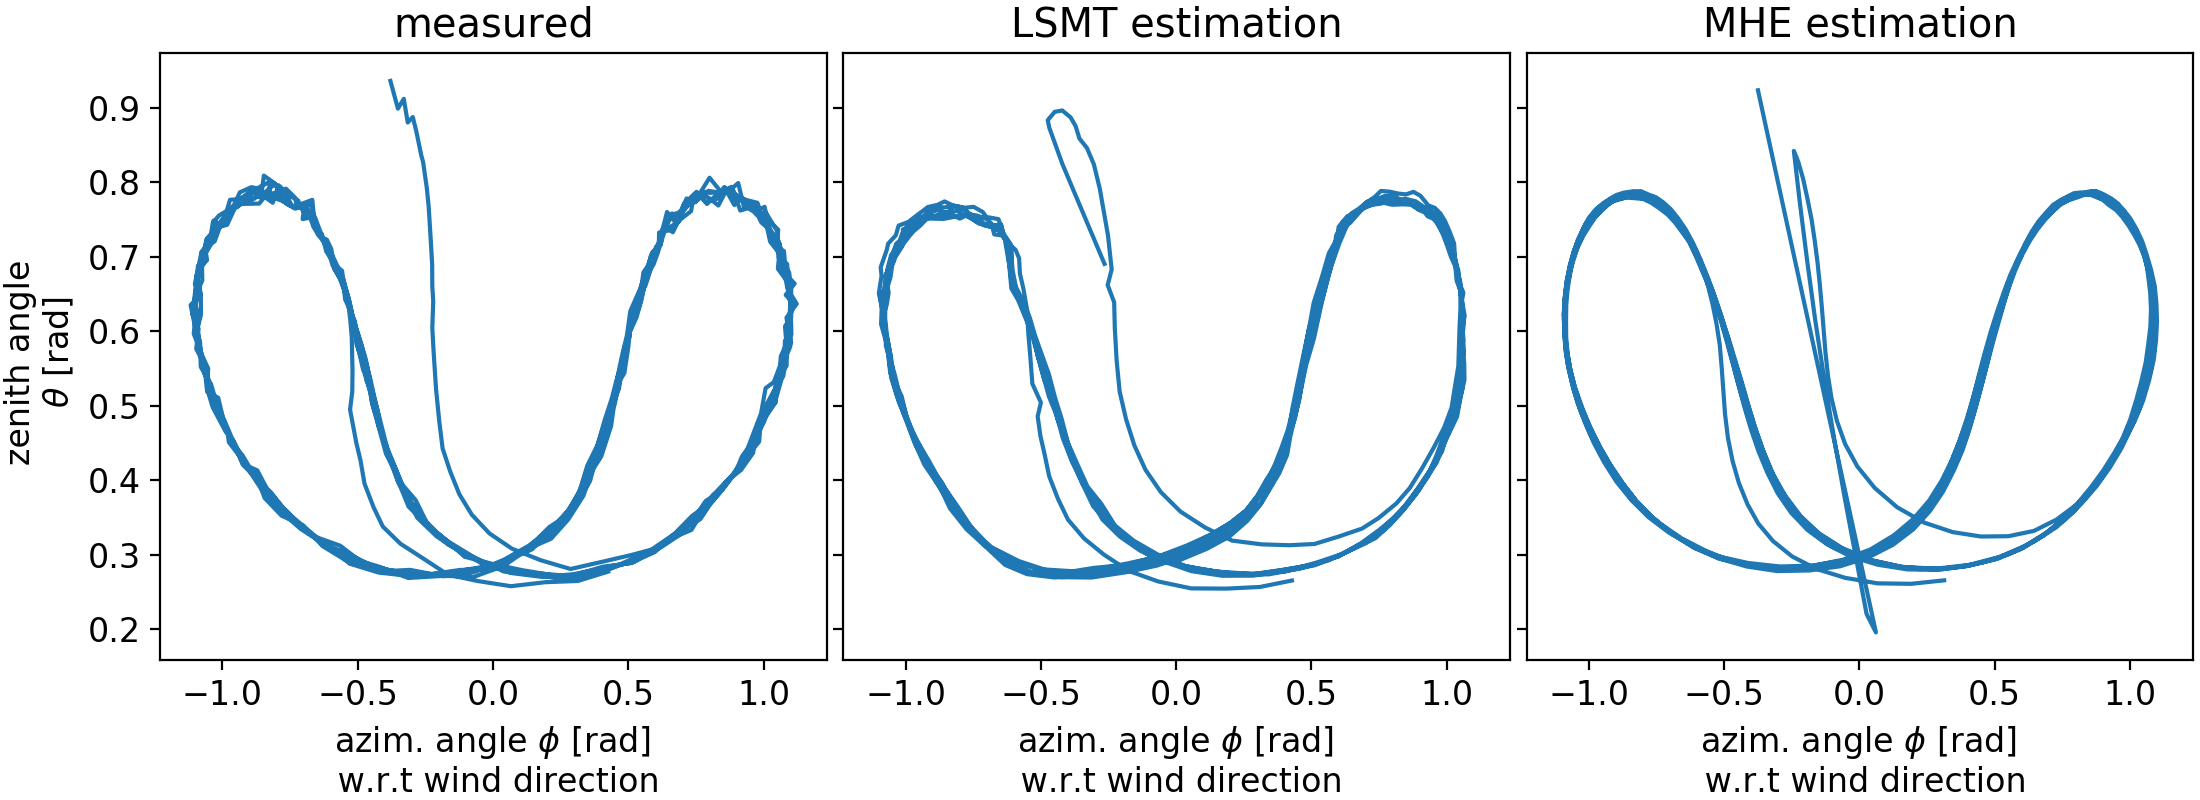

In [97]:
fig, ax= plt.subplots(1,3,figsize=(11,4), sharex=True, sharey=True)

ax[0].plot(meas[:,0], meas[:,1], label='measured')
rnn_res_df.plot(x='phi', y=['theta'], ax=ax[1], legend=False)
ax[2].plot(mhe.data['_x','phi'], mhe.data['_x','theta'], label='MHE')

ax[0].set_title('measured')
ax[1].set_title('LSMT estimation')
ax[2].set_title('MHE estimation')

for ax_i in ax:
    ax_i.set_xlabel('azim. angle $\phi$ [rad] \n w.r.t wind direction')
ax[0].set_ylabel('zenith angle \n $\\theta$ [rad]')

fig.tight_layout(pad=0.2)